In [1]:
user = "Alex"
pathtorepo = "C:\\Users\\" * user * "\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

In [2]:
using JLD, CairoMakie, GLMakie

In [84]:
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\")
Λs = load("LSE 400x400  tau_D article2 first map extended.jld2");
Λs = Λs["Λs"];
u0s = load("u0s 400x400  tau_D article2 first map extended.jld2");
u0s = u0s["u0s"];

In [9]:
# BIFURCATION CURVES

cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\Сопоставление с матконт\\файлы matlab")
I0_hom = load("I0_hom_hom.jld")["data"]
u0_hom = load("U0_hom_hom.jld")["data"]
I0_hom = I0_hom[:]
u0_hom = u0_hom[:]

I0_hom_st = load("I0_hom_stump.jld")["data"]
u0_hom_st = load("U0_hom_stump.jld")["data"]
I0_hom_st = I0_hom_st[:]
u0_hom_st = u0_hom_st[:]

I0_Fold = load("I0_Fold.jld")["data"]
U0_Fold = load("U0_Fold.jld")["data"]
I0_Fold = I0_Fold[:]
U0_Fold = U0_Fold[:]

I0_hom_bt = load("I0_hom_bt.jld")["data"]
U0_hom_bt = load("U0_hom_bt.jld")["data"]
I0_hom_bt = I0_hom_bt[:]
U0_hom_bt = U0_hom_bt[:];

index_start_hom_bt = 1; index_end_hom_bt = 8000

cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\bifurcationkit\\")

hp_codim2_1 = load("hp_codim2_1.jld2")
hp_codim2_1I0 = hp_codim2_1["I0"]
hp_codim2_1U0 = hp_codim2_1["U0"]

sn_codim2_1 = load("sn_codim2_1.jld2")
sn_codim2_1I0 = sn_codim2_1["I0"]
sn_codim2_1U0 = sn_codim2_1["U0"];

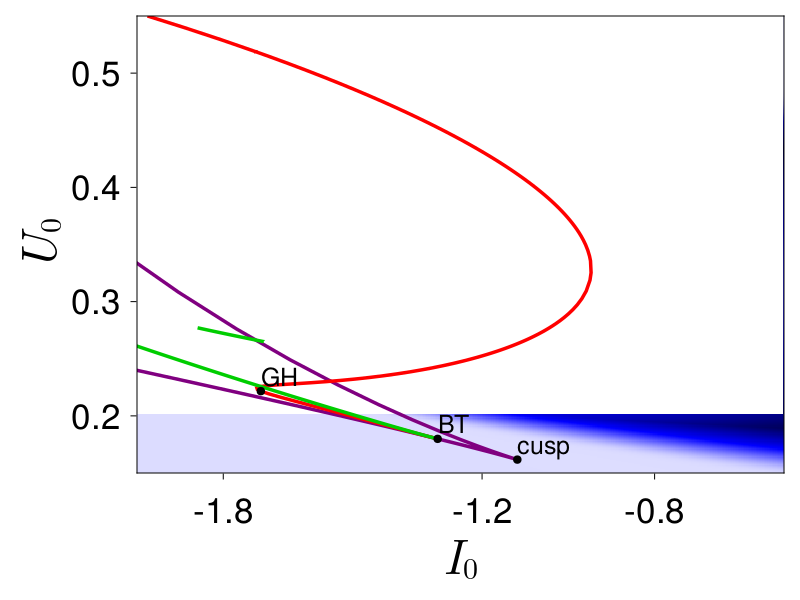

CairoMakie.Screen{IMAGE}


In [85]:
I0range = range( -0.5, -2.0,  length = 400 );
U0range = range( 0.15,  0.55, length = 400 );

index = 1
I0st, I0ed = 1, 400
U0st, U0ed = 1, 400
absmax = maximum(abs.(Λs[I0st:I0ed, U0st:U0ed, index]))

mn, mx =  -absmax, absmax

ticksize = 35
tickpad = 10.0
textsize = 25
mksize = 12
lw = 3.5

CairoMakie.activate!()
f = Figure()

ax = Axis(f[1, 1], xlabel = L"I_0",ylabel = L"U_0", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad, xticks = [-1.8, -1.2, -0.8])

hm = heatmap!(ax, I0range[I0st:I0ed], U0range[U0st:U0ed], Λs[I0st:I0ed, U0st:U0ed, index], colormap = :seismic,
                 colorrange = (mn, mx))

mkrsize = 15

lines!(ax, sn_codim2_1I0, sn_codim2_1U0, label = "Fold", linewidth = lw, color = :purple)
lines!(ax, hp_codim2_1I0, hp_codim2_1U0, label = "Hopf", linewidth = lw, color = :red)
#--------------------------------------------------------------------------------------
colorhom = :green3
lines!(ax, I0_hom, u0_hom, label = "Homoclinic", color = colorhom, linewidth = lw)
lines!(ax, I0_hom_bt[index_start_hom_bt:index_end_hom_bt], U0_hom_bt[index_start_hom_bt:index_end_hom_bt], color = colorhom, linewidth = lw)
#--------------------------------------------------------------------------------------
scatter!(ax, -1.1182463005483, 0.161724273501619, markersize = mksize, color = :black)
text!(ax, -1.1182463005483, 0.161724273501619, text = "cusp", fontsize = textsize)

scatter!(ax, -1.30295711421099, 0.179884505801528, markersize = mksize, color = :black)
text!(ax, -1.30295711421099, 0.179884505801528, text = "BT", fontsize = textsize)

scatter!(ax, -1.71286533418216, 0.221636390745317, markersize = mksize, color = :black)
text!(ax, -1.71286533418216, 0.221636390745317, text = "GH", fontsize = textsize)
#--------------------------------------------------------------------------------------
#lines!([-1.5, -2.0], [0.4, 0.4], color = :black, linewidth = 4.0)
#lines!([-1.5, -2.0], [0.26, 0.26], color = :black, linewidth = 4.0)
#lines!([-1.5, -1.5], [0.4,  0.26], color = :black, linewidth = 4.0)
#lines!([-2.0, -2.0], [0.4,  0.26], color = :black, linewidth  =4.0)
#--------------------------------------------------------------------------------------
xlims!(-2.0, -0.5)
ylims!(0.15,  0.55)
#--------------------------------------------------------------------------------------
display(f)

In [55]:
display(GLMakie.Screen(), f)

GLMakie.Screen(...)